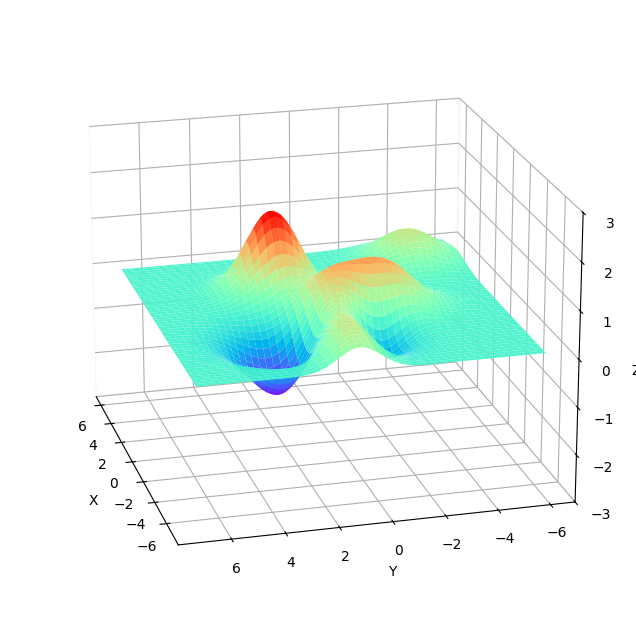

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def multivariate_gaussian(x, y, mx, my, sx, sy):
    return np.exp(-((x - mx) ** 2 / (2 * sx**2) + (y - my) ** 2 / (2 * sy**2)))


def create_landscape():
    x = np.linspace(-7, 6, 100)
    y = np.linspace(-6, 7, 100)
    X, Y = np.meshgrid(x, y)

    # More complex landscape with multiple Gaussians
    Z = -1.2 * multivariate_gaussian(X, Y, -3, 3, 1.2, 1.2)  # Deep minimum
    Z += 1.7 * multivariate_gaussian(X, Y, 2, 2, 1, 1)  # High peak
    Z -= 0.2 * multivariate_gaussian(X, Y, 0, 0, 1.2, 1.2)  # Saddle point
    Z += 1.4 * multivariate_gaussian(X, Y, -1, -1, 1, 1.4)  # Additional peak
    Z += -0.6 * multivariate_gaussian(X, Y, -3, -1, 1.4, 0.7)  # Additional valley
    Z += 0.8 * multivariate_gaussian(X, Y, -4, 1, 3, 0.8)  # Small peak
    Z += 0.7 * multivariate_gaussian(X, Y, 4, -4, 1.2, 1.2)  # Small peak

    return X, Y, Z


def plot_3d_landscape():
    X, Y, Z = create_landscape()

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot surface with semi-transparent grid
    ax.plot_surface(X, Y, Z, cmap="rainbow", linewidth=2, alpha=1, antialiased=True)

    ax.set_zlim(-3, 3)

    # Customize grid appearance
    # Make background fully transparent
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Make grid very transparent
    ax.grid(alpha=0.1)
    ax.xaxis._alpha = 0.1
    ax.yaxis._alpha = 0.1
    ax.zaxis._alpha = 0.1

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Adjust viewing angle for better visualization
    ax.view_init(elev=20, azim=165)
    plt.savefig("landscape.png", dpi=300, bbox_inches="tight", transparent=True)

    plt.show()


# Generate and display the plot
plot_3d_landscape()